<div style="text-align: center; padding: 10px; background-color: #8ef14e; border-bottom: 15px solid #008cba;border-radius: 15px 50px; ">
    <h1 style="font-size: 3em; color: #008cba;">🌐 Anemia_Prediction 🌐</h1>
    <h2 style="font-size: 2em; color: #333;">✨ Created By Abdulrahman Mohammed ✨</h2>
</div>

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;">Import Libs & Load dataset</p>

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('anemia.csv')

In [3]:
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> Data Preprocessing </p>

In [4]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [5]:
df['Result'].value_counts()

Result
0    801
1    620
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [7]:
duplicate_count=df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 887


In [8]:
df = df.drop_duplicates() # REMOVE DUBLICATED VALUES
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, 0 to 1396
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      534 non-null    int64  
 1   Hemoglobin  534 non-null    float64
 2   MCH         534 non-null    float64
 3   MCHC        534 non-null    float64
 4   MCV         534 non-null    float64
 5   Result      534 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 29.2 KB


<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> Data Visualization </p>

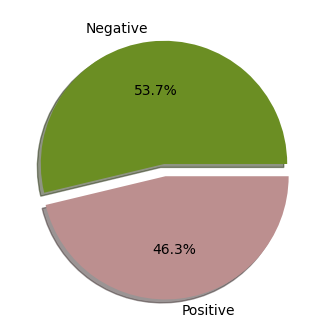

In [10]:
fig = plt.figure(figsize =(15, 4))

plt.pie(df.groupby('Result').size(), labels =['Negative', 'Positive'], explode=(0, 0.1), autopct='%1.1f%%', shadow=True,colors=['olivedrab', 'rosybrown'])

plt.show()

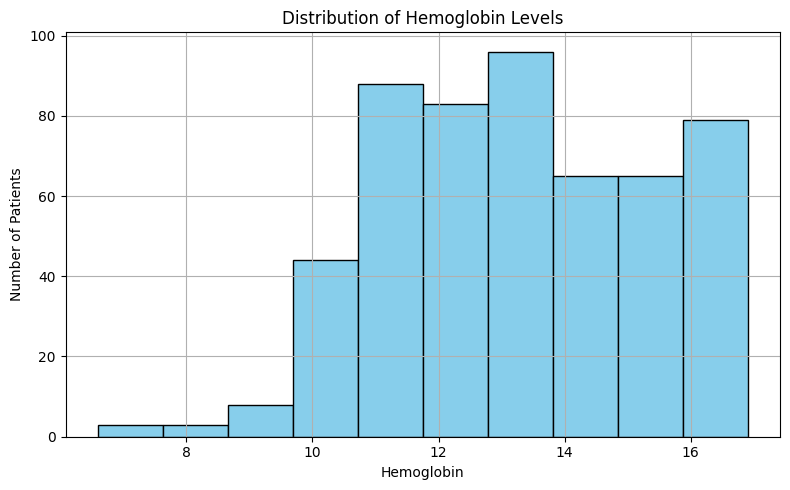

In [28]:
plt.figure(figsize=(8, 5))
plt.hist(df['Hemoglobin'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Hemoglobin Levels")
plt.xlabel("Hemoglobin")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.tight_layout()
plt.show()

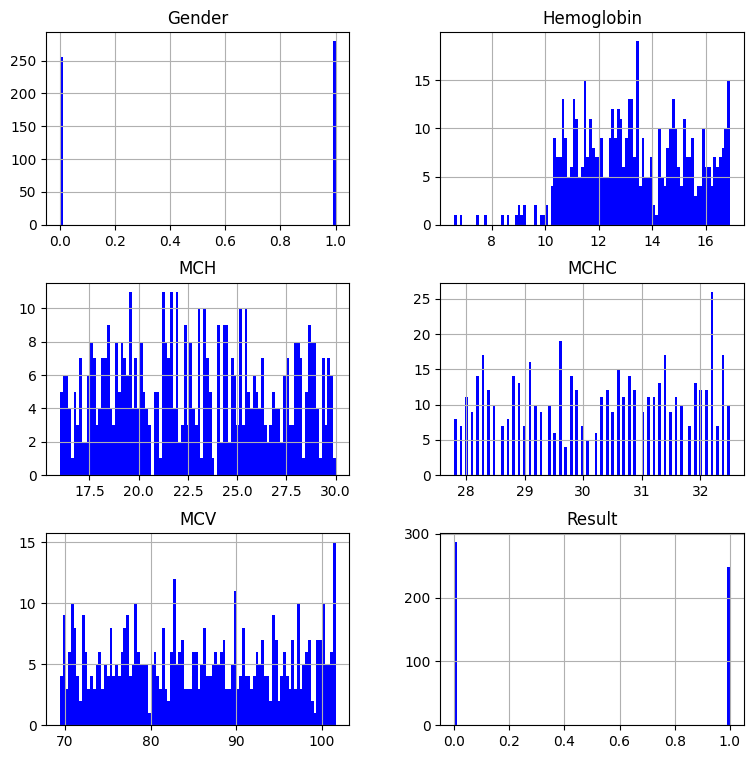

In [11]:
df.hist(bins=100, figsize=(9,9), color='b')
plt.show()


<Axes: >

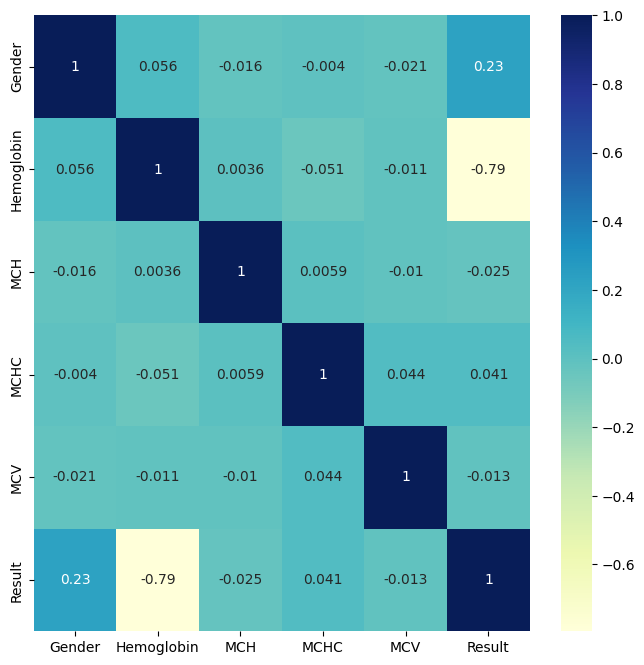

In [12]:
correlation=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation ,annot=True ,cbar=True ,cmap='YlGnBu')

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> Data Seprating </p>

In [13]:
X=df.drop(['Gender','Result'],axis=1)
Y=df['Result']

In [14]:
X.shape

(534, 4)

In [15]:
Y.shape

(534,)

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> Data Standardization </p>

In [16]:
scaler= StandardScaler()
X=scaler.fit_transform(X)

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> ML Algorithms </p>

### Support Vector Classifier

In [40]:
model = SVC(kernel='linear')
model.fit(X_train, Y_train)
print('accuracy score on the training data : ',model.score(X_train, Y_train))
print('accuracy score on the testing data : ',model.score(X_test, Y_test))

accuracy score on the training data :  0.9016393442622951
accuracy score on the testing data :  0.9065420560747663


### RandomForestClassifier

In [19]:
model2 = RandomForestClassifier()
model2.fit(X_train, Y_train)
print('accuracy score on the training data : ',model2.score(X_train, Y_train))
print('accuracy score on the testing data : ',model2.score(X_test, Y_test))

accuracy score on the training data :  1.0
accuracy score on the testing data :  0.8317757009345794


### DecisionTreeClassifier

In [20]:
model3 = tree.DecisionTreeClassifier()
model3.fit(X_train, Y_train)
print('accuracy score on the training data : ',model3.score(X_train, Y_train))
print('accuracy score on the testing data : ',model3.score(X_test, Y_test))

accuracy score on the training data :  1.0
accuracy score on the testing data :  0.8598130841121495


### KNeighborsClassifier

In [21]:
model4 =KNeighborsClassifier()
model4.fit(X_train, Y_train)
print('accuracy score on the training data : ',model4.score(X_train, Y_train))
print('accuracy score on the testing data : ',model4.score(X_test, Y_test))

accuracy score on the training data :  0.9180327868852459
accuracy score on the testing data :  0.8504672897196262


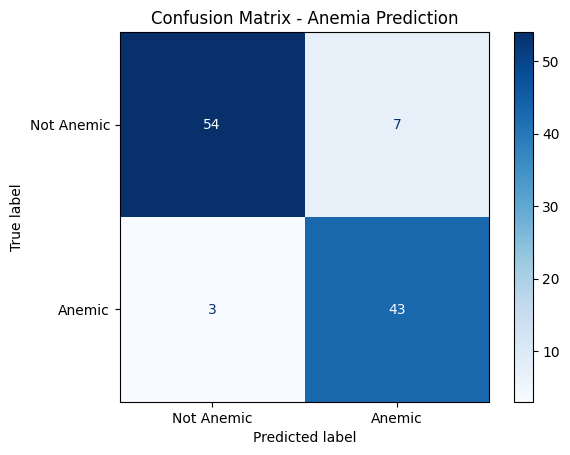

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generate predictions using the model
Y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Anemic", "Anemic"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Anemia Prediction")
plt.show()

In [ ]:
# install mlxtend
%pip install mlxtend

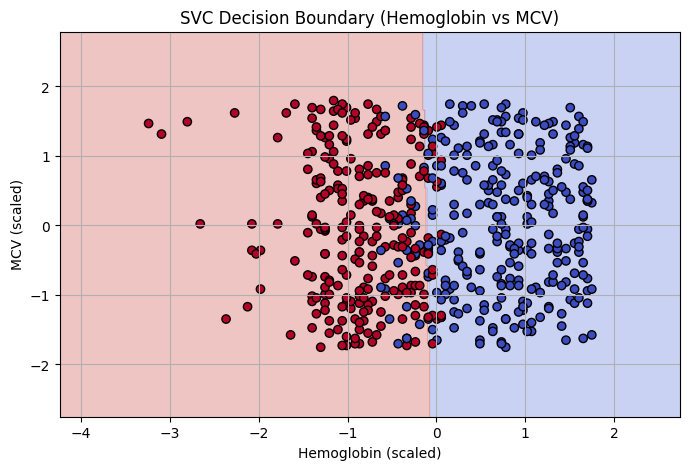

In [49]:
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Hemoglobin (scaled)')
plt.ylabel('MCV (scaled)')
plt.title('SVC Decision Boundary (Hemoglobin vs MCV)')
plt.grid(True)
plt.show()

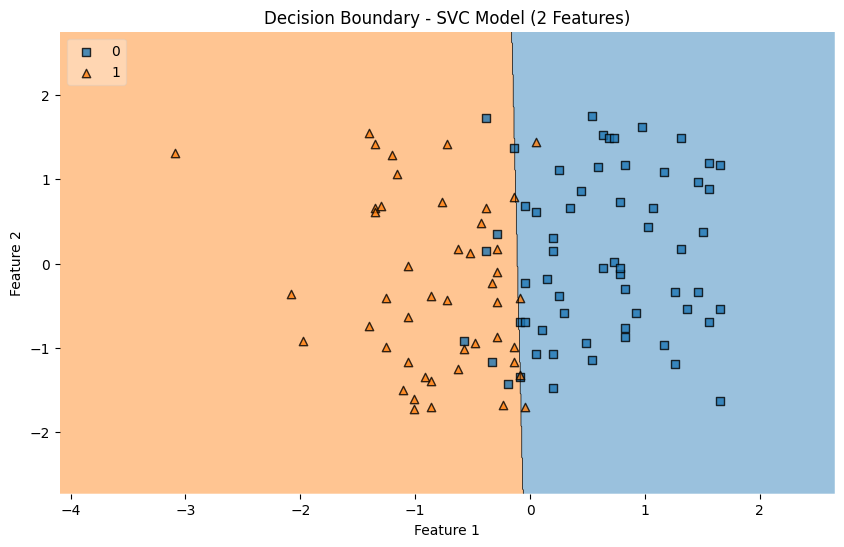

In [46]:
from mlxtend.plotting import plot_decision_regions

# Train a new SVC model on only the first two features
X_train_2d = X_train[:, :2]  # Select the first two features for training
X_test_2d = X_test[:, :2]    # Select the first two features for testing

model_2d = SVC(kernel='linear')  # Create a new SVC model
model_2d.fit(X_train_2d, Y_train)  # Train the model on the reduced dataset

# Plot decision boundary for the new SVC model
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_2d, Y_test.values, clf=model_2d, legend=2)
plt.title("Decision Boundary - SVC Model (2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> system evaluation </p>

In [38]:
input_data=(14.7,22.0,28.2,99.5)
print(input_data)
input_data_arr=np.asarray(input_data)
input_data_arr_reshape=input_data_arr.reshape(1,-1)


input_data_arr_scaler=scaler.transform(input_data_arr_reshape)
print(input_data_arr_scaler)


predict_input=model.predict(input_data_arr_scaler)
print(predict_input)


if predict_input==1:
    print("Positive +")
else:
        print("Negative -")



(14.7, 22.0, 28.2, 99.5)
[[ 0.68444216 -0.2311876  -1.45248375  1.44363145]]
[0]
Negative -


C:\Users\HP Elite BOOK\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Saving Model 

In [23]:
import joblib

joblib.dump(model, 'Ml_Anemia_graduation.pkl')
print("Model saved!")

joblib.dump(scaler, 'ScalerAnemia.pkl')
print("Scaler saved!")

loaded_model = joblib.load('Ml_Anemia_graduation.pkl')

new_predictions = loaded_model.predict(X_test)
print(f"Restored Model Accuracy: {accuracy_score(Y_test, new_predictions):.2f}")

Model saved!
Scaler saved!
Restored Model Accuracy: 0.91


In [24]:
loaded_model = joblib.load('Ml_Anemia_graduation.pkl')

In [25]:
loaded_model.predict(X_test)

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [26]:
print(Y_test)

222     1
131     0
149     0
290     1
84      1
       ..
738     1
177     1
220     1
1396    1
800     0
Name: Result, Length: 107, dtype: int64
